# Matplotlib cribsheet

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

Some useful links:
* Full colours list: http://matplotlib.org/mpl_examples/color/named_colors.hires.png
* Linestyles shown here: http://matplotlib.org/api/lines_api.html#matplotlib.lines.Line2D.set_linestyle

In [2]:
# Generate some data to use
n = 500  # number of data points

x = np.random.rand(n)  # random x co-ordinates
y = 5 * x + np.random.randn(n)  # y as a function of x with some added noise
z = [chr(i) for i in np.random.randint(97, 97+9, n)]  # sample text labels

coords = pd.DataFrame({
        'x': x,
        'y': y,
        'z': z
    })

coords.head()

,x,y,z
0,0.538908,2.671270,g
1,0.244559,0.783743,b
2,0.934396,4.641845,g
3,0.786152,3.224845,f
4,0.628846,4.015690,h


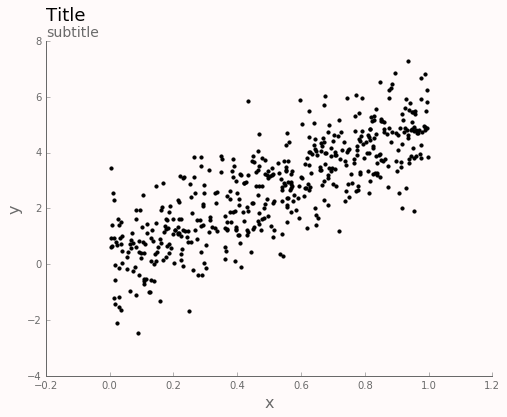

In [3]:
# Simple scatter plot
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(x, y, alpha=1, color='black', s=10)

# Add title (left aligned)
fig.suptitle('Title', ha='left', x=0.125, fontsize=18, color='k')
# ... and subtitle (also left aligned)
ax.set_title('subtitle', loc='left', fontsize=14, color='dimgray')

# Add axis labels
ax.set_xlabel('x', fontsize=16, color='dimgray')
ax.set_ylabel('y', fontsize=16, color='dimgray')

# Change axes colour
ax.spines["bottom"].set_color('dimgray')
ax.spines["left"].set_color('dimgray')
ax.tick_params(colors='dimgray')
# Remove top and bottom spines
ax.spines["top"].set_visible(False)  
ax.spines["right"].set_visible(False)
# Remove extra ticks
ax.get_xaxis().tick_bottom()  
ax.get_yaxis().tick_left()

# Set background colour
ax.set_axis_bgcolor('snow')
fig.set_facecolor('snow')

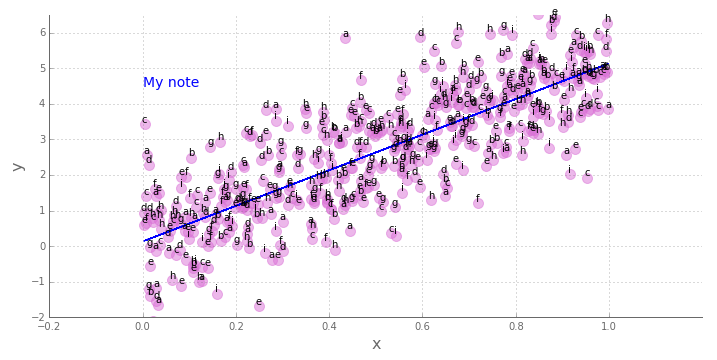

In [ ]:
# Detailed scatter plot
fig, ax = plt.subplots(figsize=(10, 5))
ax.scatter(x, y, alpha=0.5, color='orchid', s = 100)
fig.tight_layout(pad=2)

# Add text annotation to each point
for i, txt in enumerate(z):
    ax.annotate(txt, (x[i], y[i]), va="bottom", ha="center")
    
# Add linear trendline
m, c = np.polyfit(x, y, 1)
ax.plot(x, m*x+c)

# Add axis labels
ax.set_xlabel('x', fontsize=16, color='dimgray')
ax.set_ylabel('y', fontsize=16, color='dimgray')

# Add text annotation
ax.text(0, 4.5, 'My note', fontsize=14, color='blue') 

# Add gridlines
ax.grid(True, which='major', color='dimgray', linestyle='dotted') 

# Change axes colour
ax.spines["bottom"].set_color('dimgray')
ax.spines["left"].set_color('dimgray')
ax.tick_params(colors='dimgray')
# Remove top and bottom spines
ax.spines["top"].set_visible(False)  
ax.spines["right"].set_visible(False)
# Remove extra ticks
ax.get_xaxis().tick_bottom()  
ax.get_yaxis().tick_left()  
# Set axes limits
ax.set_xlim([-0.2, 1.2])
_ = ax.set_ylim([-2, 6.5])

In [ ]:
# histogram
fig, ax = plt.subplots(figsize=(8, 6))

ax.hist(x - y, bins=25, normed=True, 
        color='cadetblue', edgecolor='None') 

# Add title
fig.suptitle('title', fontsize=16, color='dimgray')
# Add axis labels
ax.set_xlabel('x', fontsize=16, color='dimgray')
ax.set_ylabel('y', fontsize=16, color='dimgray')

# Change axes colour
ax.spines["bottom"].set_color('dimgray')
ax.spines["left"].set_color('dimgray')
ax.tick_params(colors='dimgray')
# Remove top and bottom spines
ax.spines["top"].set_visible(False)  
ax.spines["right"].set_visible(False)
# Remove extra ticks
ax.get_xaxis().tick_bottom()  
ax.get_yaxis().tick_left()

In [ ]:
# Bar plot

# Aggregate the data
agg_coords = coords.groupby(z).agg('sum')
n_bars = len(agg_coords.index)
bar_width = 0.4
bar_x = np.arange(n_bars)
bar_yx = agg_coords['x']
bar_yy = agg_coords['y']

fig, ax = plt.subplots(figsize=(8, 5))

ax.bar(bar_x, bar_yx, bar_width, color='orchid', edgecolor='none')
ax.bar(bar_x + bar_width, bar_yy, bar_width, color='tomato', edgecolor='none')

# Add text for labels, title and axes ticks
ax.set_ylabel('Value')
ax.set_title('Bar chart')
ax.set_xticks(bar_x + bar_width)
ax.set_xticklabels(agg_coords.index)

# Change axes colour
ax.spines["bottom"].set_color('dimgray')
ax.spines["left"].set_color('dimgray')
ax.tick_params(colors='dimgray')
# Remove top and bottom spines
ax.spines["top"].set_visible(False)  
ax.spines["right"].set_visible(False)
# Remove extra ticks
ax.get_xaxis().tick_bottom()  
ax.get_yaxis().tick_left()

In [ ]:
agg_coords = coords.groupby(z).agg('sum')  # sort data for plotting

# Small multiples

nrows = 3
ncols = 3
num_plots = nrows * ncols  # number of subplots

fig_width = 12
fig_height = 6

fig = plt.figure(figsize=(fig_width, fig_height))
axes = [plt.subplot(nrows, ncols, i) for i in range(1, num_plots+1)]

fig.tight_layout()

for i, ax in enumerate(axes):

    z_i = agg_coords.index[i]
    sub_agg_coords = agg_coords[agg_coords.index == z_i]
        
    bar_x = 0
    bar_yx = sub_agg_coords['x']
    bar_yy = sub_agg_coords['y']
        
    ax.bar(bar_x, bar_yx, bar_width, color='orchid', edgecolor='none', label='orchid')
    ax.bar(bar_x + bar_width, bar_yy, bar_width, color='tomato', edgecolor='none', label='tomato')

    ax.set_title(z_i, color='dimgray')
    
    if (i % nrows) == 0:
        ax.set_ylabel('y axis', fontsize=16, color='dimgray')
    if (i // nrows) == (nrows - 1):
        ax.set_xlabel('x axis', fontsize=16, color='dimgray')
    
    # Change axes colour
    ax.spines["bottom"].set_color('dimgray')
    ax.spines["left"].set_color('dimgray')
    ax.tick_params(colors='dimgray')
    # Remove top and bottom spines
    ax.spines["top"].set_visible(False)  
    ax.spines["right"].set_visible(False)
    # Remove extra ticks
    ax.get_xaxis().tick_bottom()  
    ax.get_yaxis().tick_left()  
    # Set axes limits
    ax.set_xlim([-0.25, 1])
    ax.set_ylim([0, 40])
    
    ax.legend(loc='upper left', frameon=False)